In [1]:
# Import essential libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib


# Machine learning and preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats.mstats import trimmed_var
from sklearn.pipeline import make_pipeline

# Testing Model

In [2]:
def wrangle(filepath):
    # read csv file
    data = pd.read_csv(filepath)
    # load csv file into a data frame
    df = pd.DataFrame(data)
    # drop null values
    df.dropna(inplace = True)
    # remove duplicate files
    df.drop_duplicates(inplace = True)
    # drop redundant columns
    df.drop(columns = ['id','Unnamed: 0', 'Segmentation', 'Var_1'], inplace = True)
    #df['id'] = df['id'].astype(object)
    df['Work_Experience'] = df['Work_Experience'].astype(int)
    df['Family_Size'] =df['Family_Size'].astype(int)
    return df

In [3]:
filepath = 'Customer_Segmentation2.csv'


In [4]:
df_test = wrangle(filepath)
df_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Female,No,32,Yes,Healthcare,9,Low,3
1,Female,No,56,Yes,Artist,0,Low,1
2,Male,Yes,75,No,Lawyer,1,Low,1
3,Male,Yes,39,No,Entertainment,9,Low,2
4,Male,No,22,No,Healthcare,9,Low,5


In [5]:
df_test.describe()

,Age,Work_Experience,Family_Size
count,8819.000000,8819.000000,8819.000000
mean,43.517859,2.610160,2.840118
std,16.581537,3.390676,1.535051
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [6]:
df_test.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size'],
      dtype='object')

In [7]:
df_test['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df_test['Graduated'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df_test['Profession'].unique()

array(['Healthcare', 'Artist', 'Lawyer', 'Entertainment', 'Executive',
       'Doctor', 'Marketing', 'Engineer', 'Homemaker'], dtype=object)

In [11]:
df_test['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

#### Var_1 and Segmentation appears to be a leaky features. to be dropped

In [12]:
df_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Female,No,32,Yes,Healthcare,9,Low,3
1,Female,No,56,Yes,Artist,0,Low,1
2,Male,Yes,75,No,Lawyer,1,Low,1
3,Male,Yes,39,No,Entertainment,9,Low,2
4,Male,No,22,No,Healthcare,9,Low,5


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8819 entries, 0 to 10694
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           8819 non-null   object
 1   Ever_Married     8819 non-null   object
 2   Age              8819 non-null   int64 
 3   Graduated        8819 non-null   object
 4   Profession       8819 non-null   object
 5   Work_Experience  8819 non-null   int32 
 6   Spending_Score   8819 non-null   object
 7   Family_Size      8819 non-null   int32 
dtypes: int32(2), int64(1), object(5)
memory usage: 551.2+ KB


In [14]:
df_test.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size'],
      dtype='object')

In [15]:
categorical_col = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

numeric_col =['Age', 'Family_Size', 'Work_Experience']

In [16]:
ord = OrdinalEncoder()
ord.fit(df_test[categorical_col])
X_test_cat = ord.transform(df_test[categorical_col])

In [17]:
scaler = StandardScaler()
X_test_numeric = scaler.fit_transform(df_test[numeric_col])

In [18]:
X_test_processed = np.hstack([X_test_cat, X_test_numeric])

In [19]:
with open('fitted_pca_1D.pkl', 'rb') as f:
    pca = pickle.load(f)
    print('fitted_pca loaded successfully')

fitted_pca loaded successfully


In [20]:
X_pca_test = pca.transform(X_test_processed)

In [21]:
with open('final_pca_kmeans_model.pkl', 'rb') as f:
    kmeans_pca_model = pickle.load(f)
    print('model loaded successfully')

model loaded successfully


In [22]:
clusters = kmeans_pca_model.predict(X_pca_test)
df_test['predicted_cluster'] = clusters

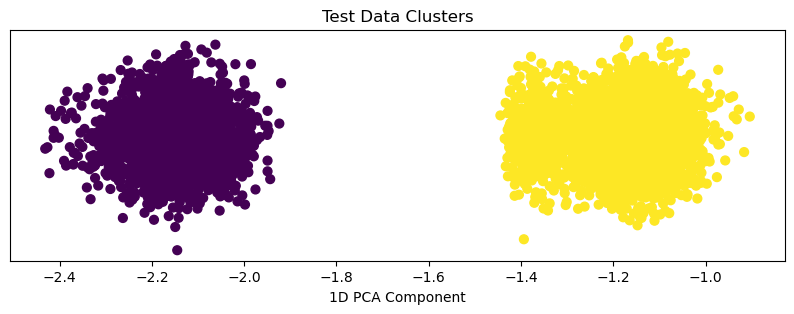

In [29]:
plt.figure(figsize = (10, 3))
y_jitter = np.zeros_like(X_pca_test.flatten()) + 0.01*np.random.randn(len(X_pca_test))
plt.scatter(X_pca_test.flatten(), y_jitter, c= clusters, s=40)
plt.yticks([])
plt.xlabel('1D PCA Component')
plt.title('Test Data Clusters')
plt.show()